# AMSR2 Sea Ice Maps

Here we describe the method to include the AMSR2 sea ice maps as provided by University of Bremen. We grab them and convert the data set to netcdf every morning at 10 a.m. from the day before.

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

# local caching
kwds = {'simplecache': dict(
    cache_storage=os.environ['INTAKE_CACHE'], 
    same_names=True
)}

In [2]:
from ac3airborne.tools import get_amsr2_seaice as seaice

In [7]:
sic = seaice.get_amsr2_seaice('halo-ac3','20220311')

/net/sever/mech/miniconda3/envs/howtoac3/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

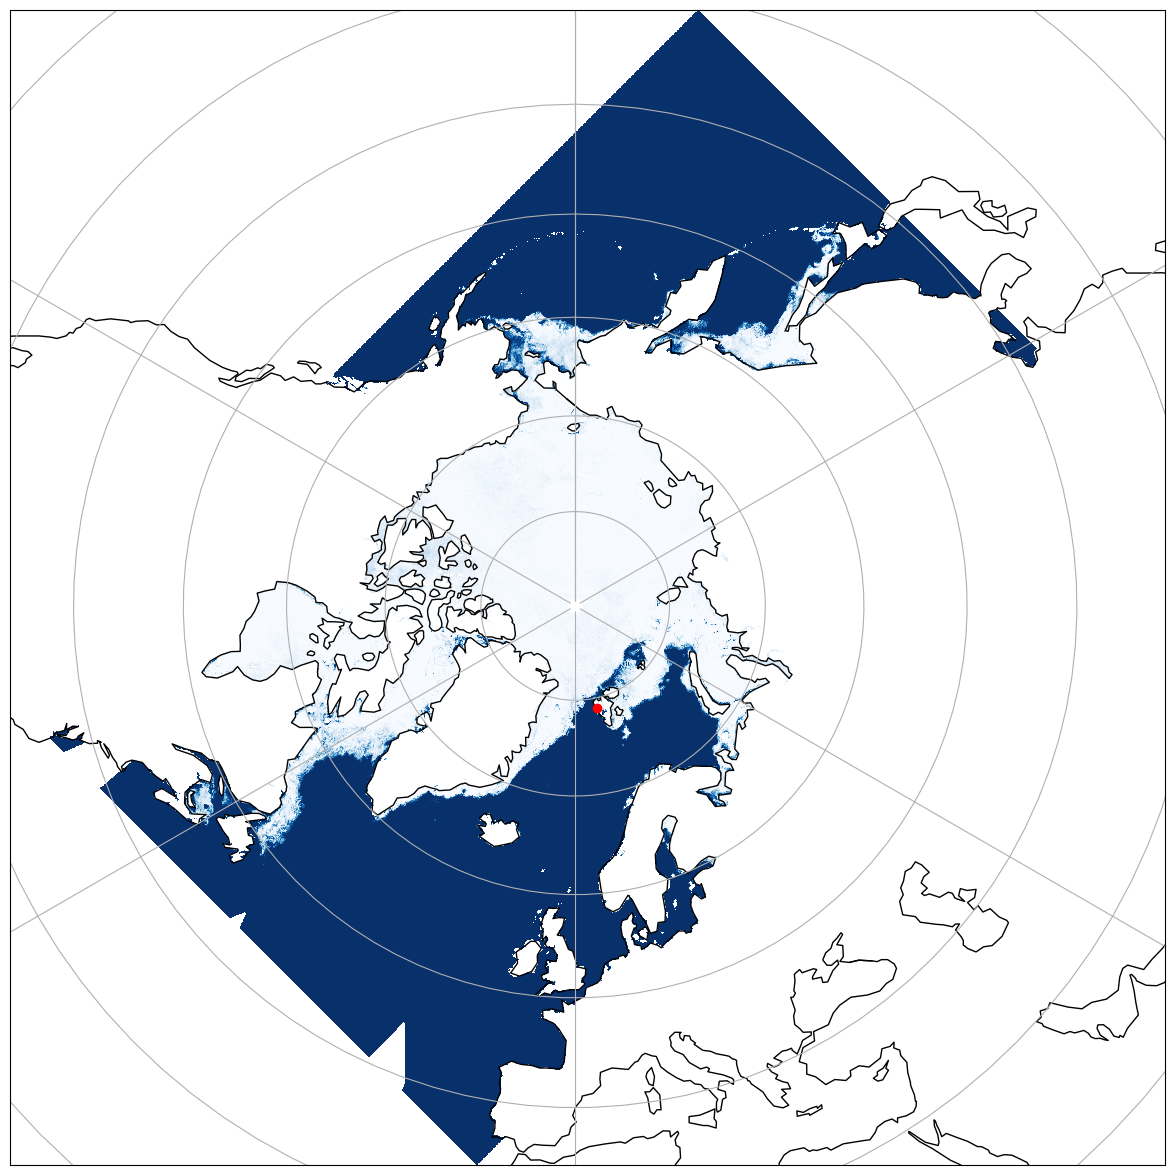

In [9]:
# prepare for plotting
proj   = ccrs.NorthPolarStereo()
#extent = (-5.0, 24.0, 78.0, 83.0)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=proj)

ax.gridlines()
ax.coastlines()

#ax.scatter(sic.lon.values.ravel(),sic.lat.values.ravel(),c=sic.seaice.values.ravel(), s= 0.1,cmap='Blues_r',transform=ccrs.PlateCarree())
ax.pcolormesh(sic.lon,sic.lat,sic.seaice,cmap='Blues_r',transform=ccrs.PlateCarree())
nya_lat = 78.924444
nya_lon = 11.928611

ax.plot(nya_lon, nya_lat, 'ro', transform=ccrs.PlateCarree())